Online Payment Fraud Detection


In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Data
df = pd.read_csv("C:\\Users\\endiemn\\Downloads\\PS_20174392719_1491204439457_log.csv")

In [3]:
# Extracting first five rows 
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# Shape of dataset
df.shape

(6362620, 11)

In [5]:
# Extracting column names
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
# Check Null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
#duplicated values
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


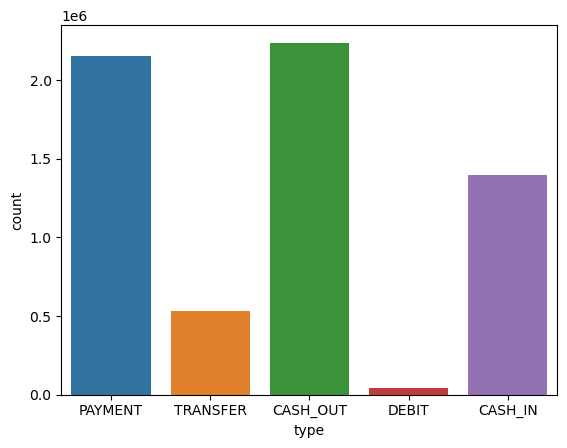

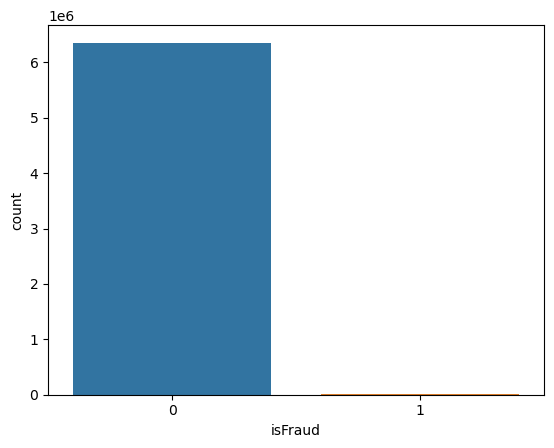

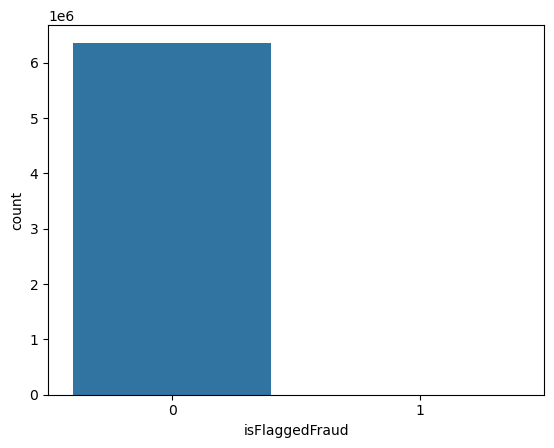

In [9]:
# Countplot
list = df[['type', 'isFraud', 'isFlaggedFraud']]
for i in list.columns:
    sns.countplot(list[i])
    plt.show()

<AxesSubplot:xlabel='type', ylabel='amount'>

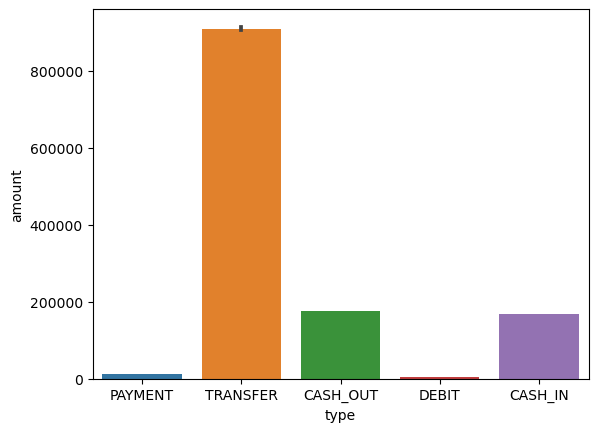

In [10]:
sns.barplot(x='type', y='amount', data=df)

In [11]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [12]:
# To convert object to int/float 
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]= lab.fit_transform(df[i])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB


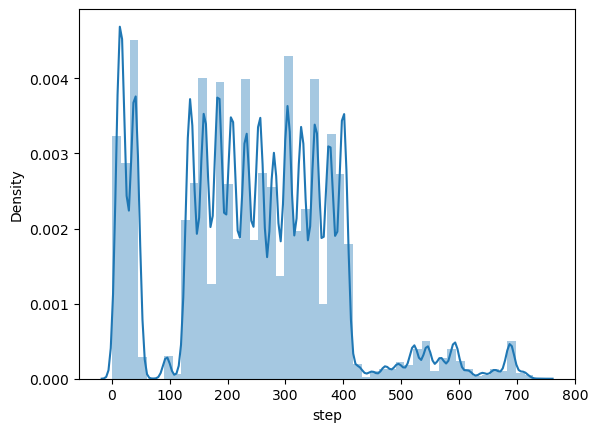

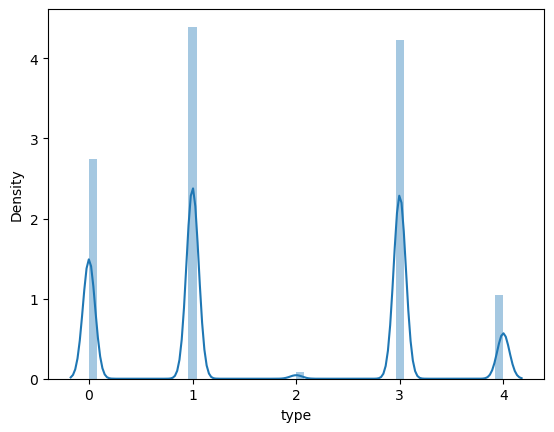

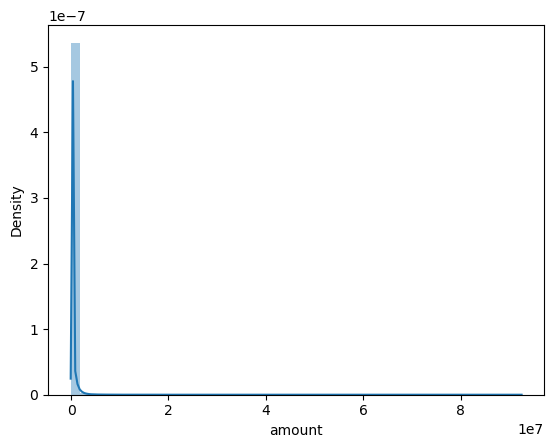

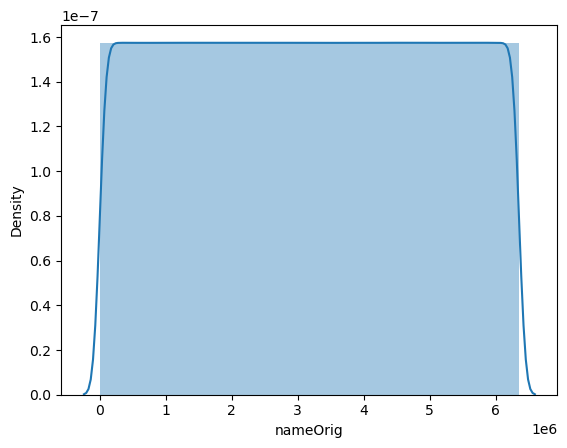

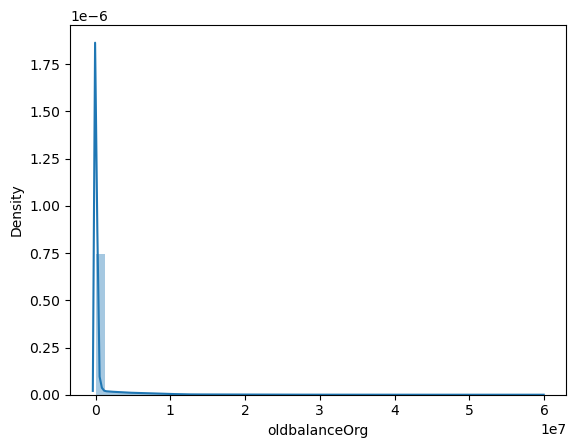

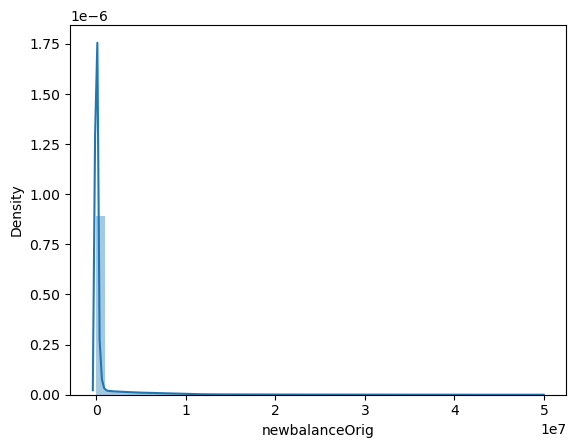

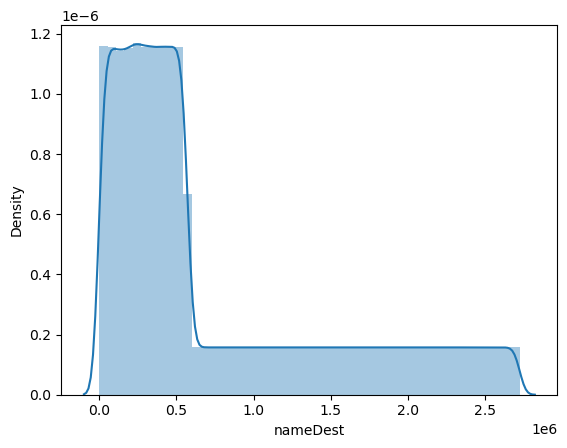

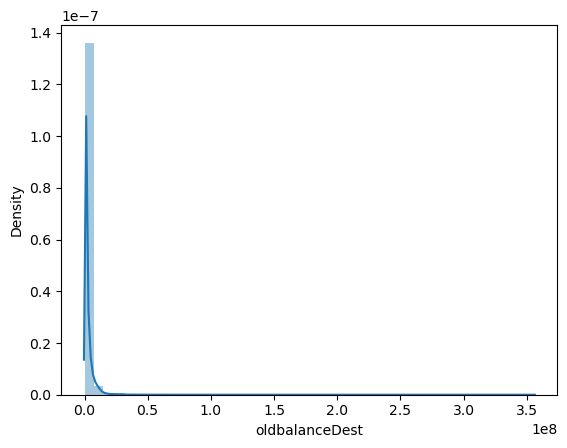

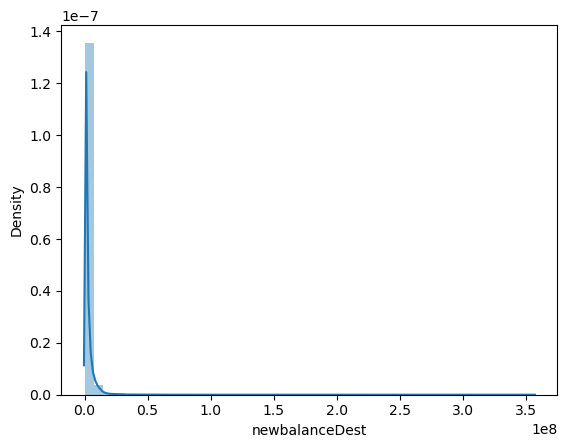

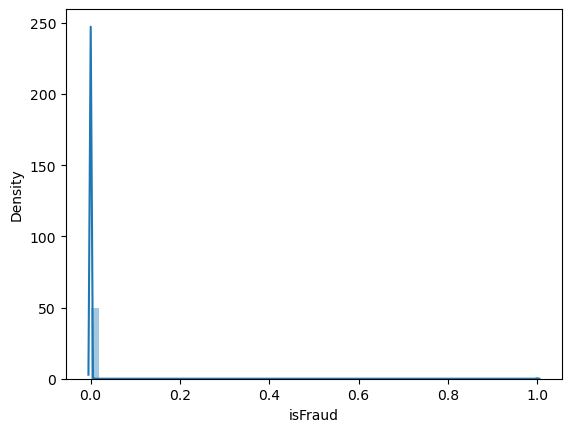

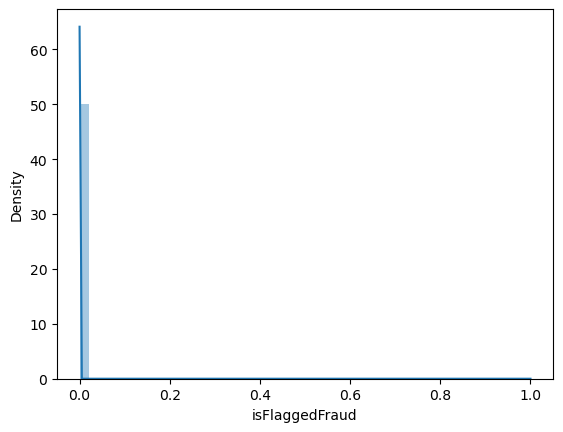

In [14]:
#Plotting , Distribution of all the variables
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

<AxesSubplot:>

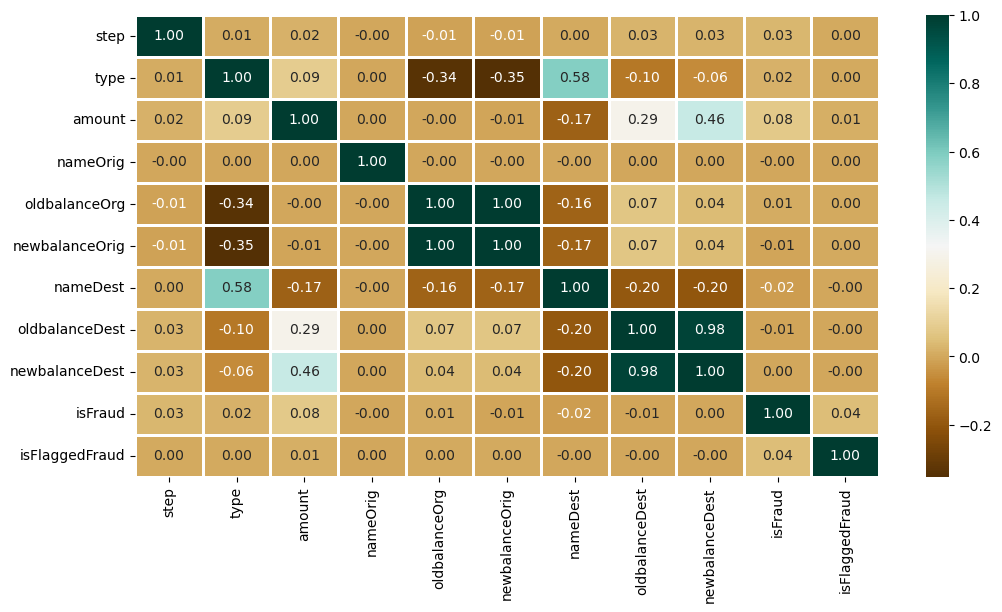

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

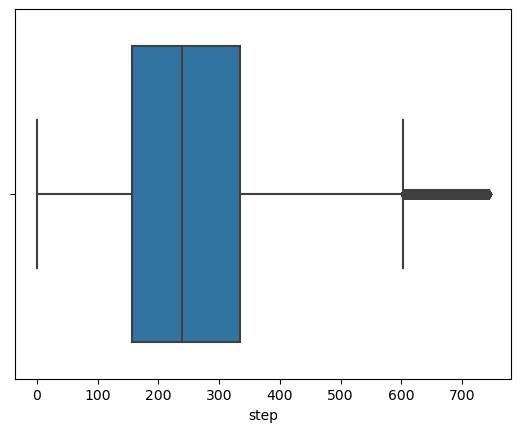

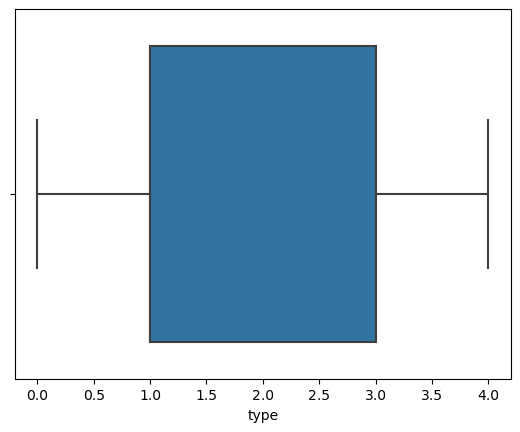

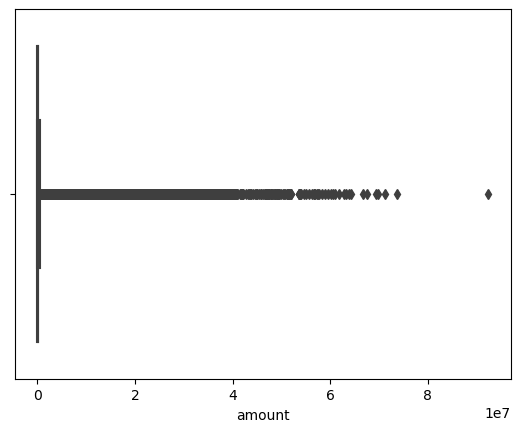

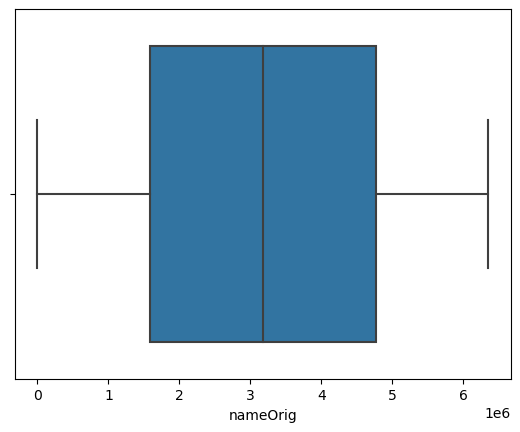

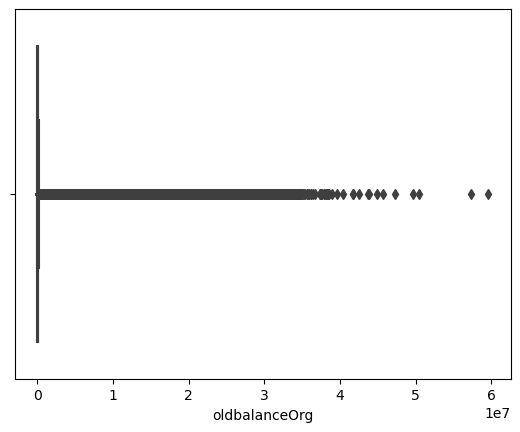

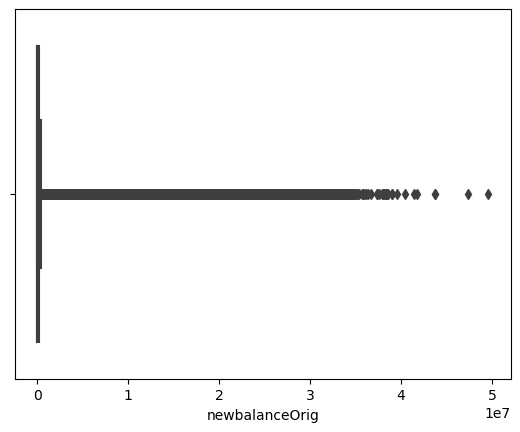

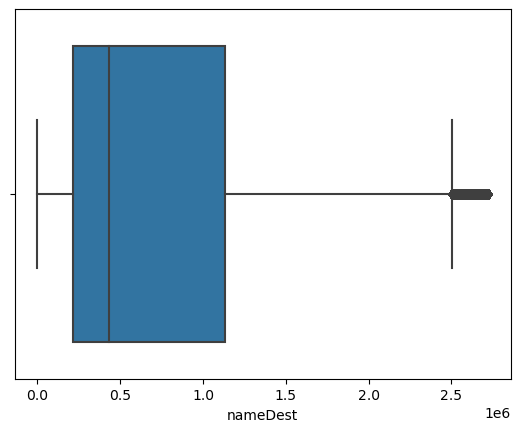

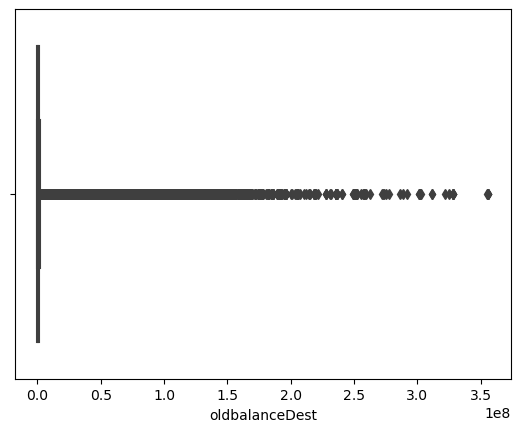

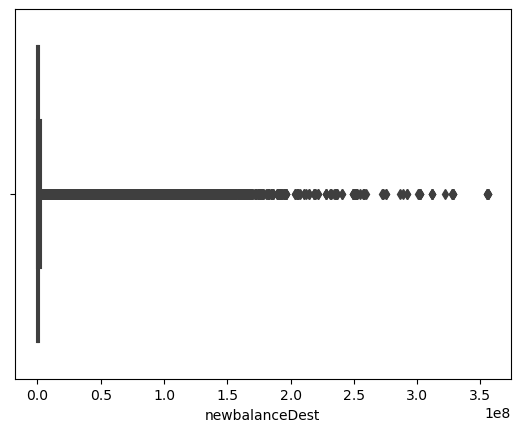

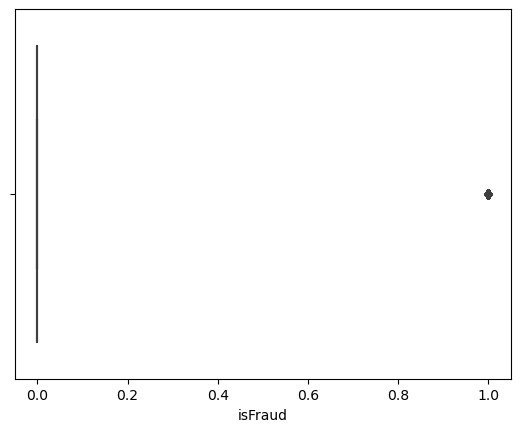

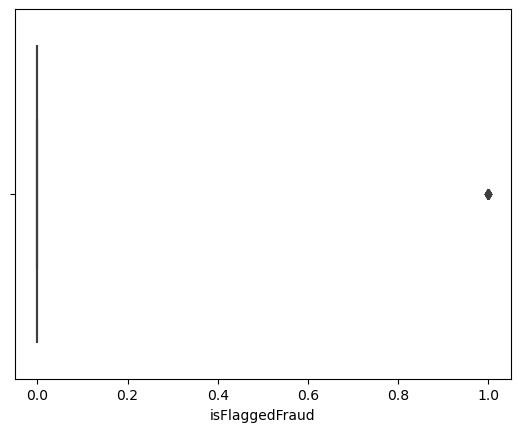

In [16]:
#Outlier Detection
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [17]:
#Outlier Treatment
for i in df.columns:
    Q1=np.quantile(df[i],0.25)
    Q2=np.quantile(df[i],0.50)
    Q3=np.quantile(df[i],0.75)
    Q4=np.quantile(df[i],1.0)
    IQR=Q3-Q1
    print("IQR=",IQR)
    Lower_Fence=Q1-(1.5*IQR)
    Upper_Fence=Q3+(1.5*IQR)
    print("Lower_Fence=", i +" = "+ str(Lower_Fence) )
    print("Upper_Fence=", i +" = "+ str(Upper_Fence) )
    print()

IQR= 179.0
Lower_Fence= step = -112.5
Upper_Fence= step = 603.5

IQR= 2.0
Lower_Fence= type = -2.0
Upper_Fence= type = 6.0

IQR= 195331.9075
Lower_Fence= amount = -279608.29125
Upper_Fence= amount = 501719.33875

IQR= 3176716.5
Lower_Fence= nameOrig = -3176743.0
Upper_Fence= nameOrig = 9530123.0

IQR= 107315.175
Lower_Fence= oldbalanceOrg = -160972.7625
Upper_Fence= oldbalanceOrg = 268287.9375

IQR= 144258.41
Lower_Fence= newbalanceOrig = -216387.615
Upper_Fence= newbalanceOrig = 360646.025

IQR= 915614.25
Lower_Fence= nameDest = -1156526.375
Upper_Fence= nameDest = 2505930.625

IQR= 943036.7075
Lower_Fence= oldbalanceDest = -1414555.06125
Upper_Fence= oldbalanceDest = 2357591.76875

IQR= 1111909.25
Lower_Fence= newbalanceDest = -1667863.875
Upper_Fence= newbalanceDest = 2779773.125

IQR= 0.0
Lower_Fence= isFraud = 0.0
Upper_Fence= isFraud = 0.0

IQR= 0.0
Lower_Fence= isFlaggedFraud = 0.0
Upper_Fence= isFlaggedFraud = 0.0



In [18]:
Data =df.copy()

In [19]:
#Seperating Dependent variable from independent variable
Test = df[['type','amount','oldbalanceOrg','newbalanceOrig']]
X = df.drop(['isFraud'],axis=1)
Y = df['isFraud']

In [20]:
!pip install imbalanced-learn

In [21]:
#Standardization
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.under_sampling import NearMiss

In [22]:
nm = NearMiss()
Xx,Yy = nm.fit_resample(X,Y)
Xx.shape,Yy.shape

((16426, 10), (16426,))

In [23]:
print('Before resampling : {}'.format(Counter(Y)))
print('After resampling : {}'.format(Counter(Yy)))

Before resampling : Counter({0: 6354407, 1: 8213})
After resampling : Counter({0: 8213, 1: 8213})


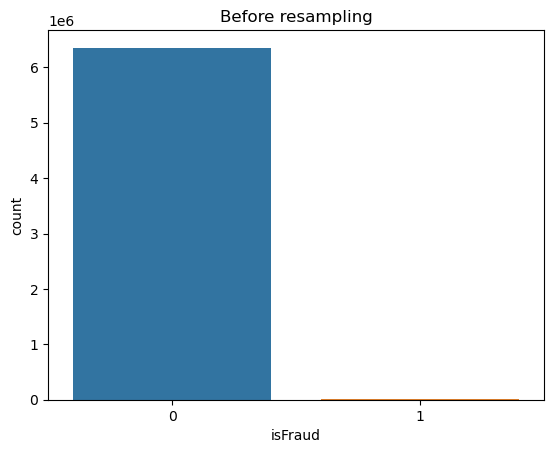

In [24]:
sns.countplot(Y)
plt.title('Before resampling')
plt.show()

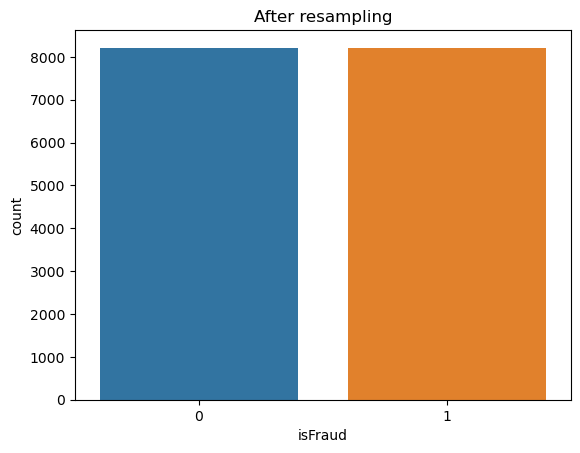

In [25]:
sns.countplot(Yy)
plt.title('After resampling')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
std = StandardScaler()
Xx = std.fit_transform(Xx)
Xx

array([[-0.55159612, -0.59080995, -0.39553162, ..., -0.114953  ,
        -0.22426483, -0.03122523],
       [-0.80535137, -0.59080995, -0.39794274, ..., -0.114953  ,
        -0.22583657, -0.03122523],
       [ 1.22986935,  1.54051747, -0.39691881, ..., -0.114953  ,
        -0.2251691 , -0.03122523],
       ...,
       [ 2.25006905, -0.59080995,  3.01300735, ..., -0.08611088,
         2.02181374, -0.03122523],
       [ 2.25006905,  1.54051747,  0.05790589, ..., -0.114953  ,
        -0.22849456, -0.03122523],
       [ 2.25006905, -0.59080995,  0.05790589, ...,  2.62658983,
         2.36754969, -0.03122523]])

In [27]:
#Spliting Data into training and testing
x_train,x_test,y_train,y_test=train_test_split(Xx,Yy,train_size=0.7,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((11498, 10), (4928, 10), (11498,), (4928,))

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve

In [29]:
#Model Building:-
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [30]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [31]:
y_pre=log.predict(x_test)
y_pre

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [32]:
test_acc_LR = log.score(x_test,y_test)
test_acc_LR

0.9375

In [33]:
log.score(x_train,y_train)

0.9387719603409289

In [34]:
LR=pd.DataFrame({'Actual':y_test,'Predicted':y_pre})
LR

,Actual,Predicted
11741,1,1
13248,1,1
7082,0,0
12419,1,1
6725,0,0
...,...,...
7885,0,0
9512,1,1
14488,1,1
7412,0,0


In [35]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier

In [36]:
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
y_tree=tree.predict(x_test)
y_tree

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [38]:
test_acc_DT= tree.score(x_test,y_test)
test_acc_DT

0.9827516233766234

In [39]:
tree.score(x_train,y_train)

1.0

In [86]:
DT=pd.DataFrame({'Actual':y_test,'Predicted':y_tree})
DT

,Actual,Predicted
11741,1,1
13248,1,1
7082,0,0
12419,1,1
6725,0,0
...,...,...
7885,0,0
9512,1,1
14488,1,1
7412,0,0


In [41]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier

In [42]:
forest = RandomForestClassifier()
forest.fit(x_train,y_train)

RandomForestClassifier()

In [43]:
y_forest=forest.predict(x_test)
y_forest

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [44]:
test_acc_RF=forest.score(x_test,y_test)
test_acc_RF

0.9892451298701299

In [45]:
forest.score(x_train,y_train)

1.0

In [46]:
RF=pd.DataFrame({'Actual':y_test,'Predicted':y_forest})
RF

,Actual,Predicted
11741,1,1
13248,1,1
7082,0,0
12419,1,1
6725,0,0
...,...,...
7885,0,0
9512,1,1
14488,1,1
7412,0,0


In [47]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [49]:
y_knn=knn.predict(x_test)
y_knn

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [50]:
test_acc_KNN = knn.score(x_test,y_test)
test_acc_KNN

0.9099025974025974

In [51]:
knn.score(x_train,y_train)

0.9248564967820491

In [52]:
KN=pd.DataFrame({'Actual':y_test,'Predicted':y_knn})
KN

,Actual,Predicted
11741,1,1
13248,1,1
7082,0,0
12419,1,1
6725,0,0
...,...,...
7885,0,0
9512,1,1
14488,1,1
7412,0,0


In [53]:
#naive bayes
from sklearn.naive_bayes import GaussianNB

In [54]:
naive = GaussianNB()
naive.fit(x_train,y_train)

GaussianNB()

In [55]:
y_naive=naive.predict(x_test)
y_naive

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [56]:
test_acc_NAIVE = naive.score(x_test,y_test)
test_acc_NAIVE

0.9247159090909091

In [57]:
naive.score(x_train,y_train)

0.92546529831275

In [58]:
NAIVE=pd.DataFrame({'Actual':y_test,'Predicted':y_naive})
NAIVE

,Actual,Predicted
11741,1,1
13248,1,1
7082,0,0
12419,1,1
6725,0,0
...,...,...
7885,0,0
9512,1,1
14488,1,1
7412,0,0


In [59]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [60]:
# xgboost
from xgboost import XGBClassifier

In [61]:
xgboost = GaussianNB()
xgboost.fit(x_train,y_train)

GaussianNB()

In [62]:
y_xgboost=xgboost.predict(x_test)
y_xgboost

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [63]:
test_acc_xgboost = xgboost.score(x_test,y_test)
test_acc_xgboost

0.9247159090909091

In [64]:
xgboost.score(x_train,y_train)

0.92546529831275

In [65]:
xgboost=pd.DataFrame({'Actual':y_test,'Predicted':y_xgboost})
xgboost

,Actual,Predicted
11741,1,1
13248,1,1
7082,0,0
12419,1,1
6725,0,0
...,...,...
7885,0,0
9512,1,1
14488,1,1
7412,0,0


In [66]:
#svm
from sklearn import svm

In [67]:
svm = svm.SVC()
svm.fit(x_train,y_train)

SVC()

In [68]:
y_svm=svm.predict(x_test)
y_svm

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [69]:
test_acc_SVM = svm.score(x_test,y_test)
test_acc_SVM

0.9381087662337663

In [70]:
svm.score(x_train,y_train)

0.9359888676291529

In [71]:
SVV=pd.DataFrame({'Actual':y_test,'Predicted':y_svm})
SVV

,Actual,Predicted
11741,1,1
13248,1,1
7082,0,0
12419,1,1
6725,0,0
...,...,...
7885,0,0
9512,1,1
14488,1,1
7412,0,0


In [72]:
from sklearn.metrics import classification_report,roc_curve,confusion_matrix,accuracy_score,auc,roc_auc_score

In [73]:
#CONFUSION MATRIX
mat=confusion_matrix(y_test,y_pre)
mat

array([[2349,   89],
       [ 219, 2271]], dtype=int64)

In [74]:
class_rep=classification_report(y_test,y_pre)
print(class_rep)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2438
           1       0.96      0.91      0.94      2490

    accuracy                           0.94      4928
   macro avg       0.94      0.94      0.94      4928
weighted avg       0.94      0.94      0.94      4928



In [75]:
#No. of Wrong Predictions by LogisticRegression
LR = len(LR.loc[LR['Actual']!=LR['Predicted']])
#No. of Wrong Predictions by DecisionTree
DT = len(DT.loc[DT['Actual']!=DT['Predicted']])
#No. of Wrong Predictions by RandomForest
RF = len(RF.loc[RF['Actual']!=RF['Predicted']])
#No. of Wrong Predictions by KNN
KN = len(KN.loc[KN['Actual']!=KN['Predicted']])
#No. of Wrong Predictions by Naive Bayes
NAIVE = len(NAIVE.loc[NAIVE['Actual']!=NAIVE['Predicted']])
#No. of Wrong Predictions by linear svm
SVV = len(SVV.loc[SVV['Actual']!=SVV['Predicted']])
#No. of Wrong Predictions by xgboost
xgboost = len(xgboost.loc[xgboost['Actual']!=xgboost['Predicted']])

In [76]:
#DataFrame of No. of Wrong Predictions
DataFrame = pd.DataFrame({'Model':['LogisticRegression','DecisionTree','RandomForest', 'KNN','Naive Bayes','linear svm','xgboost'],
                    'Wrong Predictions':[LR,DT,RF, KN, NAIVE, SVV , xgboost]})
DataFrame

,Model,Wrong Predictions
0,LogisticRegression,308
1,DecisionTree,85
2,RandomForest,53
3,KNN,444
4,Naive Bayes,371
5,linear svm,305
6,xgboost,371


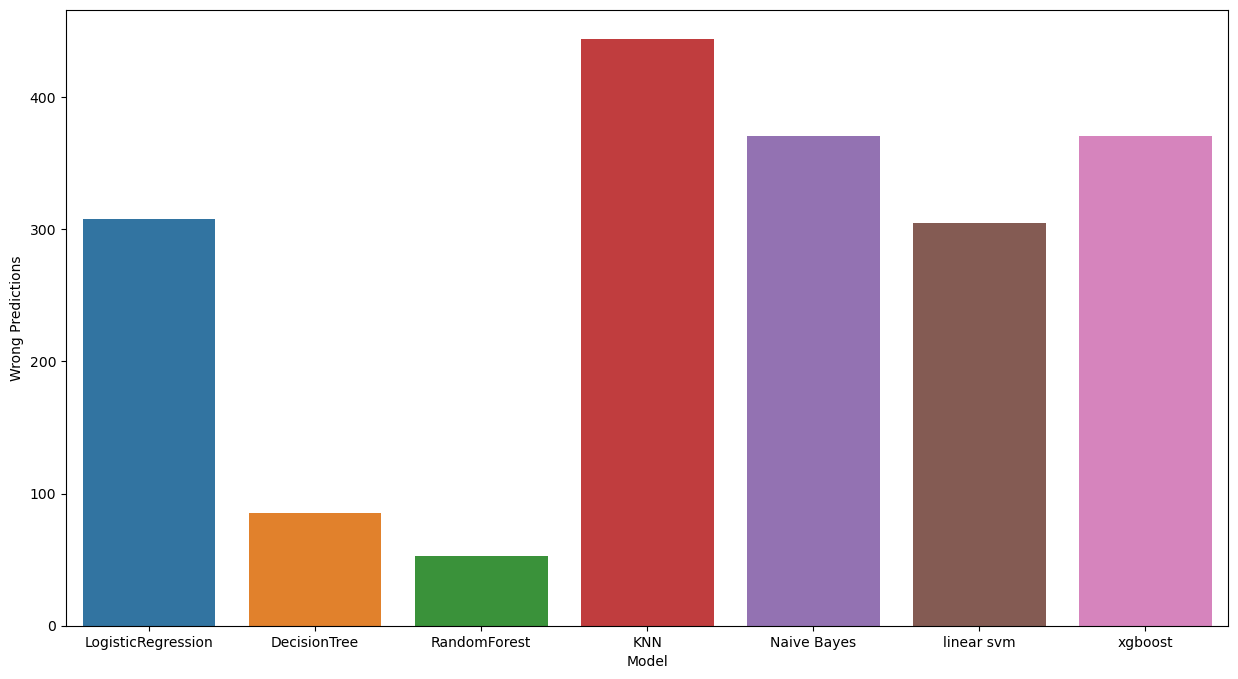

In [77]:
#Plotting
plt.figure(figsize=(15,8))
sns.barplot(x=DataFrame['Model'],y=DataFrame['Wrong Predictions'])
plt.show()

In [78]:
#Accuracy test
new_df = pd.DataFrame({'name':['LogisticRegression','DecisionTree','RandomForest', 'KNN','Naive Bayes','linear svm','xgboost'],
                    'Accuracy':[test_acc_LR,test_acc_DT,test_acc_RF, test_acc_KNN, test_acc_NAIVE, test_acc_SVM , test_acc_xgboost]})
new_df

,name,Accuracy
0,LogisticRegression,0.937500
1,DecisionTree,0.982752
2,RandomForest,0.989245
3,KNN,0.909903
4,Naive Bayes,0.924716
5,linear svm,0.938109
6,xgboost,0.924716


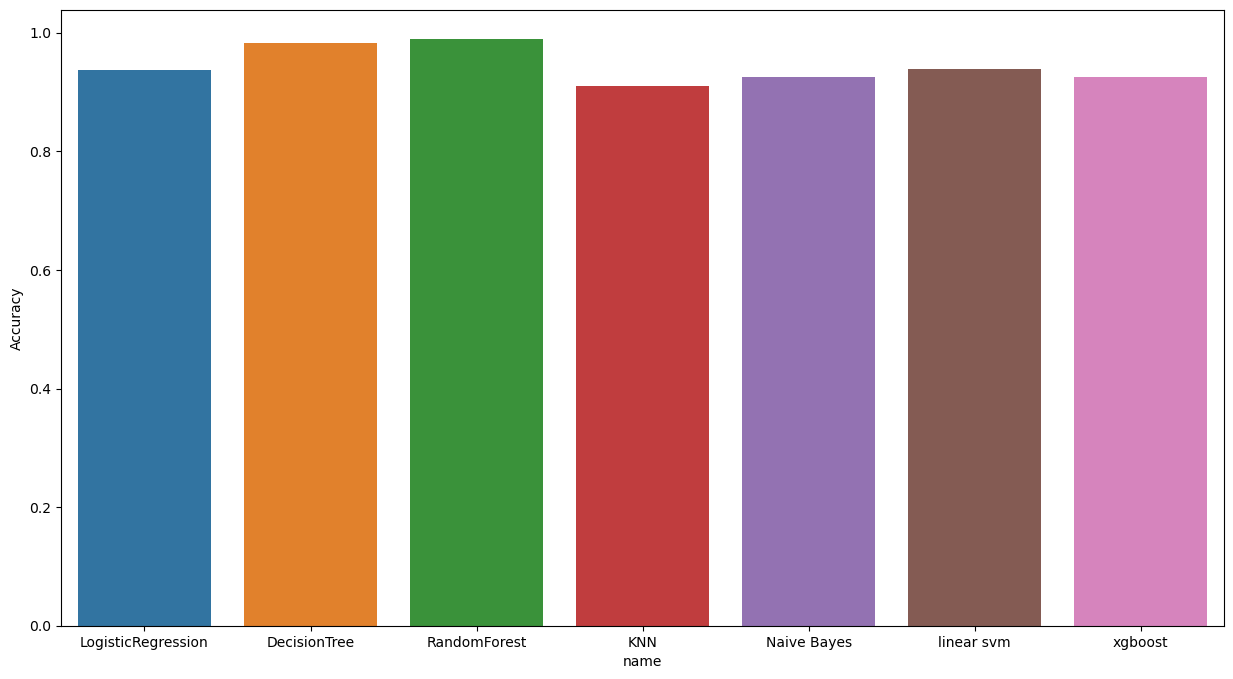

In [79]:
#Plotting
plt.figure(figsize=(15,8))
sns.barplot(x=new_df['name'],y=new_df['Accuracy'])
plt.show()

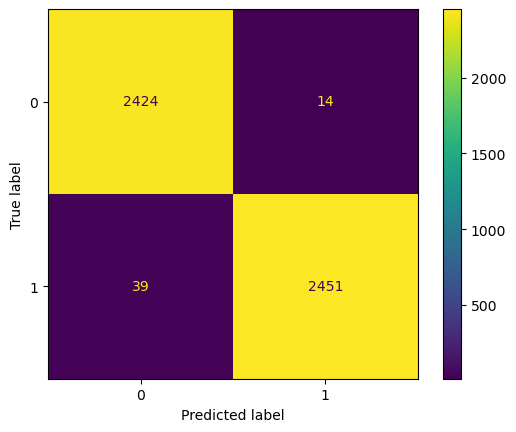

In [80]:
#The best-performed accuracy is RandomForest & wrong prediction is less for RandomForest model
#plotting the Confusion Matrix for the same(RandomForest).
from sklearn.metrics import plot_confusion_matrix
 
plot_confusion_matrix(forest, x_test,y_test)
plt.show()

In [81]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,1,0
6362616,743,4,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,1,0
6362617,743,1,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,1,0
6362618,743,4,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,1,0


In [82]:
Y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [83]:
#Random Forest Model Testing
#checking for row 3rd by Random Forest model that it is fraud or not  - isFraud value '1' means fraud , isFraud value '0' mean not fraud
forest.predict([[1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,0]])

array([1], dtype=int64)

In [87]:
#actual and predicted value by random forest model of row 3rd
DT.iloc[3]

Actual       1
Predicted    1
Name: 12419, dtype: int64